# Telangana Ground Water Level Analysis Jan 2021 - Feb 2022

## Data Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
d=pd.read_csv('ground_water_level_2021_January- 2022 February.csv')
df=d.copy()

In [3]:
print(d)

       district       mandal      village        lat       long        date  \
0      ADILABAD     Adilabad     Adilabad  19.668299  78.524700  01-01-2021   
1      ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  01-01-2021   
2      ADILABAD         Bela   Chandpally  19.684431  78.848456  01-01-2021   
3      ADILABAD     Bheempur         Arli  19.831960  78.379310  01-01-2021   
4      ADILABAD     Bheempur     Bheempur  19.772188  78.417841  01-01-2021   
...         ...          ...          ...        ...        ...         ...   
16851   YADADRI    Valigonda   T. somaram  17.399953  78.952290  01-02-2022   
16852   YADADRI    Valigonda  Varkatpally  17.338506  78.932216  01-02-2022   
16853   YADADRI    Valigonda  Vemulakonda  17.347782  79.143433  01-02-2022   
16854   YADADRI      Y.Gutta   Mallapuram  17.633555  78.911638  01-02-2022   
16855   YADADRI      Y.Gutta   Motakondur        NaN        NaN  01-02-2022   

       value  
0       8.90  
1       6.01  
2     

In [4]:
#Shape of the Dataset
d.shape

(16856, 7)

In [5]:
#Information of the Dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16856 entries, 0 to 16855
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  16856 non-null  object 
 1   mandal    16856 non-null  object 
 2   village   16856 non-null  object 
 3   lat       13846 non-null  float64
 4   long      13426 non-null  float64
 5   date      16856 non-null  object 
 6   value     14857 non-null  float64
dtypes: float64(3), object(4)
memory usage: 921.9+ KB


In [6]:
#Displays the first five records
d.head()

,district,mandal,village,lat,long,date,value
0,ADILABAD,Adilabad,Adilabad,19.668299,78.524700,01-01-2021,8.90
1,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,01-01-2021,6.01
2,ADILABAD,Bela,Chandpally,19.684431,78.848456,01-01-2021,8.10
3,ADILABAD,Bheempur,Arli,19.831960,78.379310,01-01-2021,8.05
4,ADILABAD,Bheempur,Bheempur,19.772188,78.417841,01-01-2021,6.91


In [7]:
#Displays the last 5 records
d.tail()

,district,mandal,village,lat,long,date,value
16851,YADADRI,Valigonda,T. somaram,17.399953,78.952290,01-02-2022,5.15
16852,YADADRI,Valigonda,Varkatpally,17.338506,78.932216,01-02-2022,5.08
16853,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,01-02-2022,3.08
16854,YADADRI,Y.Gutta,Mallapuram,17.633555,78.911638,01-02-2022,6.20
16855,YADADRI,Y.Gutta,Motakondur,NaN,NaN,01-02-2022,10.74


In [8]:
d.columns

Index(['district', 'mandal', 'village', 'lat', 'long', 'date', 'value'], dtype='object')

In [9]:
d.sample(5)

,district,mandal,village,lat,long,date,value
7464,KAMAREDDY,BHIKNOOR,KACHAPOOR,NaN,NaN,01-07-2021,NaN
14311,SURYAPET,ATHMAKUR(S),ATHMAKUR(S),NaN,NaN,01-12-2021,2.50
1660,MEDAK,Shivampet,Usrikapally,17.491600,78.234190,01-02-2021,19.60
10999,JANGAON,Bachannapet,Padamati Keshapur,17.838299,78.939400,01-10-2021,3.56
13332,BHUPALPALLY,Kataram,Shankarampally 125(D),18.603804,79.898529,01-12-2021,18.41


## Data Cleansing

In [10]:
#Check null values
d.isnull().sum()

district       0
mandal         0
village        0
lat         3010
long        3430
date           0
value       1999
dtype: int64

In [11]:
#Fill null values with 0
d.fillna('0',axis=1,inplace=True)

In [12]:
#Check null values
d.isnull().sum()

district    0
mandal      0
village     0
lat         0
long        0
date        0
value       0
dtype: int64

In [13]:
#Check duplicated values
d.duplicated().sum()

0

In [14]:
#Convert to upper case
d['district'].str.upper()

0        ADILABAD
1        ADILABAD
2        ADILABAD
3        ADILABAD
4        ADILABAD
           ...   
16851     YADADRI
16852     YADADRI
16853     YADADRI
16854     YADADRI
16855     YADADRI
Name: district, Length: 16856, dtype: object

In [15]:
#Convert to lower case
d['mandal'].str.lower()

0           adilabad
1        bazarhatnur
2               bela
3           bheempur
4           bheempur
            ...     
16851      valigonda
16852      valigonda
16853      valigonda
16854        y.gutta
16855        y.gutta
Name: mandal, Length: 16856, dtype: object

In [16]:
d

,district,mandal,village,lat,long,date,value
0,ADILABAD,Adilabad,Adilabad,19.668299,78.5247,01-01-2021,8.9
1,ADILABAD,Bazarhatnur,Bazarhatnur,19.458888,78.350833,01-01-2021,6.01
2,ADILABAD,Bela,Chandpally,19.684431,78.848456,01-01-2021,8.1
3,ADILABAD,Bheempur,Arli,19.83196,78.37931,01-01-2021,8.05
4,ADILABAD,Bheempur,Bheempur,19.772188,78.417841,01-01-2021,6.91
...,...,...,...,...,...,...,...
16851,YADADRI,Valigonda,T. somaram,17.399953,78.95229,01-02-2022,5.15
16852,YADADRI,Valigonda,Varkatpally,17.338506,78.932216,01-02-2022,5.08
16853,YADADRI,Valigonda,Vemulakonda,17.347782,79.143433,01-02-2022,3.08
16854,YADADRI,Y.Gutta,Mallapuram,17.633555,78.911638,01-02-2022,6.2


## Data Transformation

In [17]:
#drop the columns
d.drop(['lat','long'],axis=1,inplace=True)

In [18]:
d

,district,mandal,village,date,value
0,ADILABAD,Adilabad,Adilabad,01-01-2021,8.9
1,ADILABAD,Bazarhatnur,Bazarhatnur,01-01-2021,6.01
2,ADILABAD,Bela,Chandpally,01-01-2021,8.1
3,ADILABAD,Bheempur,Arli,01-01-2021,8.05
4,ADILABAD,Bheempur,Bheempur,01-01-2021,6.91
...,...,...,...,...,...
16851,YADADRI,Valigonda,T. somaram,01-02-2022,5.15
16852,YADADRI,Valigonda,Varkatpally,01-02-2022,5.08
16853,YADADRI,Valigonda,Vemulakonda,01-02-2022,3.08
16854,YADADRI,Y.Gutta,Mallapuram,01-02-2022,6.2


In [19]:
#Rename the column
d.rename(columns={'district':'District'},inplace=True)

In [20]:
d

,District,mandal,village,date,value
0,ADILABAD,Adilabad,Adilabad,01-01-2021,8.9
1,ADILABAD,Bazarhatnur,Bazarhatnur,01-01-2021,6.01
2,ADILABAD,Bela,Chandpally,01-01-2021,8.1
3,ADILABAD,Bheempur,Arli,01-01-2021,8.05
4,ADILABAD,Bheempur,Bheempur,01-01-2021,6.91
...,...,...,...,...,...
16851,YADADRI,Valigonda,T. somaram,01-02-2022,5.15
16852,YADADRI,Valigonda,Varkatpally,01-02-2022,5.08
16853,YADADRI,Valigonda,Vemulakonda,01-02-2022,3.08
16854,YADADRI,Y.Gutta,Mallapuram,01-02-2022,6.2


In [21]:
d.dtypes

District    object
mandal      object
village     object
date        object
value       object
dtype: object

In [22]:
#Change the data types
d["date"] = pd.to_datetime(d["date"],format="%d-%m-%Y")
d['District']=d['District'].astype('string')
d['value']=d['value'].astype('float')
#d= d.convert_dtypes() automatic conversion

In [23]:
d.dtypes

District            string
mandal              object
village             object
date        datetime64[ns]
value              float64
dtype: object

In [24]:
#Sort the data by District
d.sort_values(by='District',ascending=True)

,District,mandal,village,date,value
0,ADILABAD,Adilabad,Adilabad,2021-01-01,8.90
12044,ADILABAD,Bheempur,Bheempur,2021-11-01,4.75
12043,ADILABAD,Bheempur,Arli,2021-11-01,7.10
12042,ADILABAD,Bela,Chandpally,2021-11-01,7.50
12041,ADILABAD,Bazarhatnur,Bazarhatnur,2021-11-01,2.82
...,...,...,...,...,...
10828,YADADRI,S.Narayanpur,S.Narayanpur,2021-09-01,9.83
10829,YADADRI,Thurkapally,Gandamalla,2021-09-01,5.00
10830,YADADRI,Valigonda,Arror,2021-09-01,0.98
10832,YADADRI,Valigonda,Varkatpally,2021-09-01,2.07


In [25]:
d['month']=d['date'].dt.month
d['year']=d['date'].dt.year

## Data Wrangling

####  Districts with ground water level less than 2 mbgl 

In [26]:
District1=d[d['value']<2]
List1=pd.DataFrame(District1.groupby('District') ['village'].count())
print("Total number of Districts: ",District1['District'].nunique())
List1.sort_values('village',ascending=False)

Total number of Districts:  33


,village
District,
KAMAREDDY,398
SURYAPET,395
RANGAREDDY,333
MEDCHAL,291
NALGONDA,284
NIZAMABAD,248
KHAMMAM,216
NIRMAL,183
MEDAK,144


####  Districts with ground water level in the range of 2-10 mbgl 

In [27]:
District2=d[(d['value']>2) & ((d['value']<10))]
List2=pd.DataFrame(District2.groupby('District') ['village'].count())
print("Total number of Districts: ",District2['District'].nunique())
List2.sort_values('village',ascending=False)

Total number of Districts:  33


,village
District,
NALGONDA,799
BHADRADRI,622
NIZAMABAD,555
RANGAREDDY,475
SIDDIPET,398
MAHABUBABAD,363
YADADRI,341
KAMAREDDY,335
KHAMMAM,331


####  Districts with ground water level in the range of 10-20 mbgl 

In [28]:
District3=d[(d['value']>10) & ((d['value']<20))]
List3=pd.DataFrame(District3.groupby('District') ['village'].count())
print("Total number of Districts: ",District3['District'].nunique())
List3.sort_values('village',ascending=False)

Total number of Districts:  33


,village
District,
NIZAMABAD,293
MEDAK,267
KAMAREDDY,217
SANGAREDDY,204
SIDDIPET,187
NALGONDA,140
VIKARABAD,138
BHUPALPALLY,133
RANGAREDDY,128


####  Districts with ground water level in the range of 20-40 mbgl 

In [29]:
District4=d[(d['value']>20) & ((d['value']<40))]
List4=pd.DataFrame(District4.groupby('District') ['village'].count())
print("Total number of Districts: ",District4['District'].nunique())
List4.sort_values('village',ascending=False)

Total number of Districts:  22


,village
District,
MEDAK,104
NIZAMABAD,79
BHADRADRI,52
SANGAREDDY,48
BHUPALPALLY,43
KAMAREDDY,28
MEDCHAL,26
SIDDIPET,26
VIKARABAD,25


####  Districts with ground water level above 40 mbgl 

In [30]:
District5=d[d['value']>40]
List5=pd.DataFrame(District5.groupby('District') ['village'].count())
print("Total number of Districts: ",District5['District'].nunique())
List5.sort_values('village',ascending=False)

Total number of Districts:  4


,village
District,
BHADRADRI,10
KHAMMAM,5
MEDCHAL,1
VIKARABAD,1


####  District with maximum ground water level

In [31]:
Max_groundwater=d[d['value']==d['value'].max()]
Max_groundwater

,District,mandal,village,date,value,month,year
3522,VIKARABAD,Vikarabad,Maildevarpally,2021-03-01,48.39,3,2021


####  District with minimum ground water level  except 0

In [32]:
d1=d.copy()
d1['month']=d1['month'].astype('Int64')
d1['year']=d1['year'].astype('Int64')
d1[d1['value']==0]=np.nan

Min_groundwater=d1[d1['value']==d1['value'].min()]
Min_groundwater

,District,mandal,village,date,value,month,year
8844,MANCHERIAL,Bhimini,Rampur,2021-08-01,0.03,8,2021
11887,SURYAPET,Mothey,Urlaguda,2021-10-01,0.03,10,2021


####  Districts with ground water level  0

In [33]:
data1=df.copy()
Districts=data1[data1['value']==0]
Lists=pd.DataFrame(Districts.groupby('district') ['village'].count())
print("Total number of Districts: ",Districts['district'].nunique())
Lists.sort_values('village',ascending=False)

Total number of Districts:  3


,village
district,
MANCHERIAL,7
BHADRADRI,3
KUMURAM BHEEM,3


####  Average Water levels in Each District

In [34]:
Average_waterlevel=pd.DataFrame(d.groupby('District') ['value'].mean())
Average_waterlevel

,value
District,
ADILABAD,6.043571
BHADRADRI,7.213986
BHUPALPALLY,10.107262
HANUMAKONDA,3.575338
HYDERABAD,4.964702
JAGITYAL,3.798341
JANGAON,5.718571
JOGULAMBA(GADWAL),5.604328
KAMAREDDY,5.873561


## Descriptive Statistics

In [35]:
d['value'].describe()

count    16856.000000
mean         6.214560
std          5.862603
min          0.000000
25%          2.140000
50%          4.700000
75%          8.750000
max         48.390000
Name: value, dtype: float64

In [36]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
value,16856.0,6.214560,5.862603,0.0,2.14,4.7,8.75,48.39
month,16856.0,5.785714,3.648563,1.0,2.00,5.5,9.00,12.00
year,16856.0,2021.142857,0.349937,2021.0,2021.00,2021.0,2021.00,2022.00


In [37]:
# Average Groundwater level in mbgl
d['value'].mean()

6.214560393925013

In [38]:
# Median
d['value'].median()

4.7

In [39]:
#Standard Deviation
d['value'].std()

5.862602891502532

In [40]:
# Variance
d['value'].var()

34.370112663453845

In [41]:
# Mode
d1=d.copy()
d1[d1['value']==0]=np.nan
d1['value'].mode()

0    4.1
dtype: float64

## Data Visualization

#### District wise Maximum Ground water levels

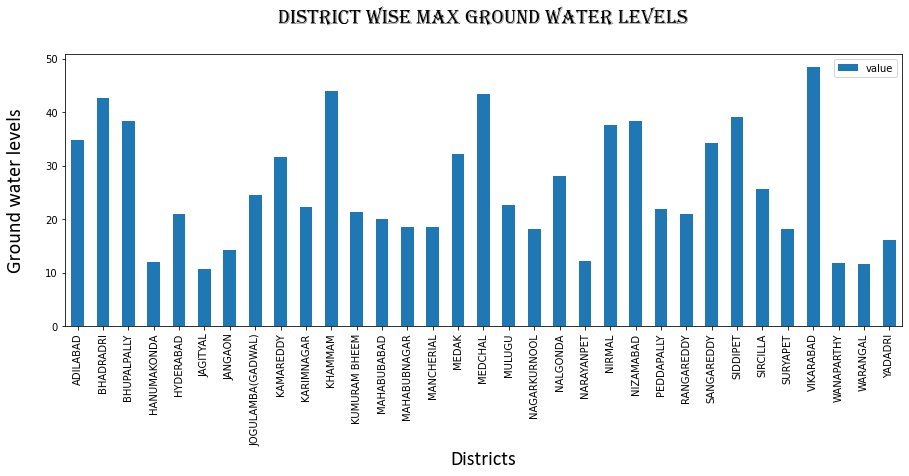

In [42]:
font1={'family':'Algerian','color':'black','size':20,'fontweight':'bold'}
font2={'family':'Calibri','color':'black','size':20}

pd.DataFrame(d.groupby('District') ['value'].max()).plot.bar(figsize=(15,5))
plt.title("District wise Max Ground water levels",fontdict=font1,pad=30)
plt.xlabel("Districts",fontdict=font2,labelpad=5)
plt.ylabel("Ground water levels",fontdict=font2,labelpad=20)
plt.xticks(color='black', rotation=90)
plt.yticks(color='black')
plt.show()

#### District wise Average Ground water levels

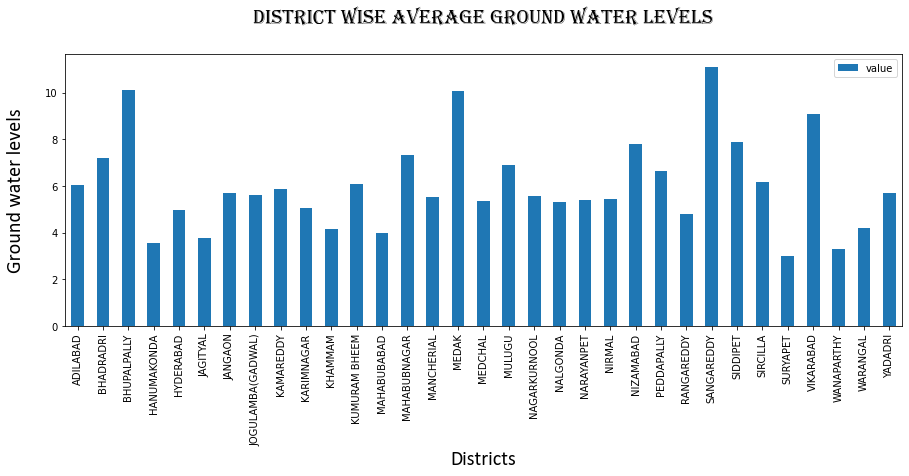

In [43]:
font1={'family':'Algerian','color':'black','size':20,'fontweight':'bold'}
font2={'family':'Calibri','color':'black','size':20}

pd.DataFrame(d.groupby('District') ['value'].mean()).plot.bar(figsize=(15,5))
plt.title("District wise Average Ground water levels",fontdict=font1,pad=30)
plt.xlabel("Districts",fontdict=font2,labelpad=5)
plt.ylabel("Ground water levels",fontdict=font2,labelpad=20)
plt.xticks(color='black', rotation=90)
plt.yticks(color='black')
plt.show()

#### District wise Minimum Ground water levels

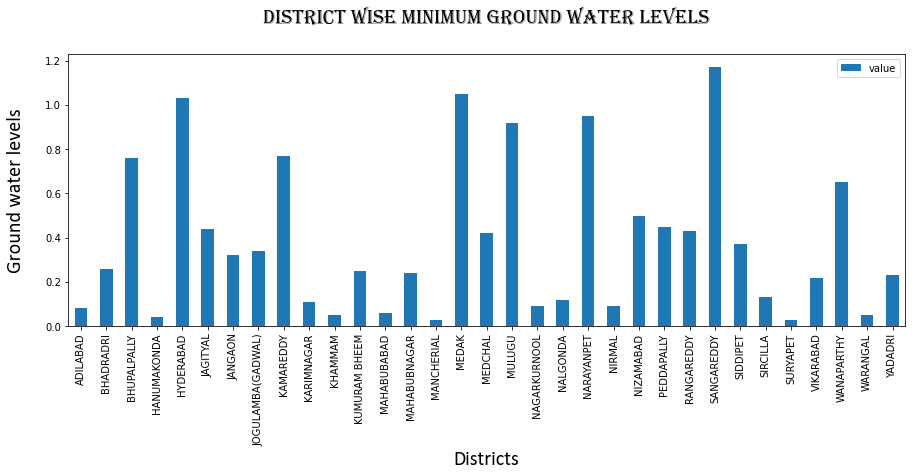

In [44]:
font1={'family':'Algerian','color':'black','size':20,'fontweight':'bold'}
font2={'family':'Calibri','color':'black','size':20}

pd.DataFrame(d1.groupby('District') ['value'].min()).plot.bar(figsize=(15,5))
plt.title("District wise Minimum Ground water levels",fontdict=font1,pad=30)
plt.xlabel("Districts",fontdict=font2,labelpad=5)
plt.ylabel("Ground water levels",fontdict=font2,labelpad=20)
plt.xticks(color='black', rotation=90)
plt.yticks(color='black')
plt.show()

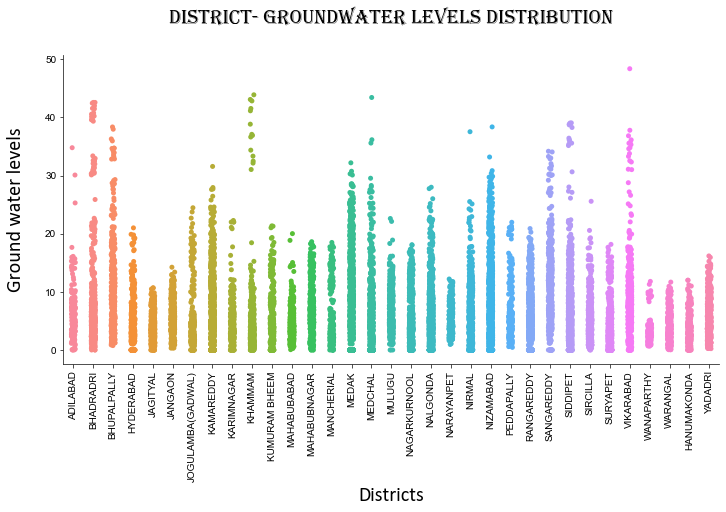

In [45]:
# District- Groundwater levels Distribution
import seaborn as sns
plt.style.use('seaborn-bright')
sns.set_style("ticks")
plt.style.use('seaborn-bright')
sns.catplot(y="value",x='District',hue='District',data=d,height=5,aspect=2)
plt.title("District- Groundwater levels Distribution",fontdict=font1,pad=30)
plt.xlabel("Districts",fontdict=font2,labelpad=5)
plt.ylabel("Ground water levels",fontdict=font2,labelpad=20)
plt.xticks(color='black', rotation=90)
plt.yticks(color='black')
plt.show()

In [46]:
from pandas_profiling import ProfileReport
k=ProfileReport(d)
k.to_file('Report.html')

In [47]:
k